In [190]:
import pandas as pd
import scipy.stats as st
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
import warnings
import os
import warnings

In [191]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.rcParams['figure.figsize'] = (13,4)
sns.set(
    style='darkgrid',
    color_codes=True,
    font_scale=1.5)
np.set_printoptions(
    suppress=True,
    linewidth=200)
pd.set_option(
    'display.max_rows', 1000,
    'display.max_columns', None,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import data

In [192]:
path = os.getcwd()
train = pd.read_csv(path + "/data/train.csv")
test = pd.read_csv(path+ "/data/test.csv")
train["train_test"]= 1
test["train_test"]= 0

In [193]:
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [194]:
quantitative = [f for f in train.columns if train[f].dtypes != "object"]
qualitative = [f for f in train.columns if train[f].dtypes == "object"]

# Overview

There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

Quantitative: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

Qualitative: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

In [195]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [196]:
missing = train.isna().sum()
missing[missing>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [197]:
missing = test.isna().sum()
missing[missing>0].sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

# Distribution of the dependent Variable SalePrice

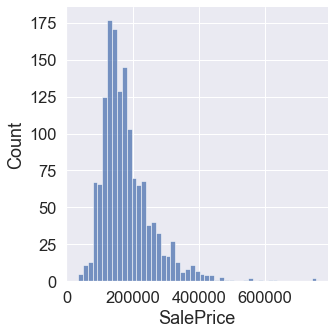

In [198]:
sns.displot( x = train["SalePrice"])

SalePrice is not normally distributed. For continous data like Saleprice a regression model will predict the data. For a regression we need normally distributed data.

transformation:
* logaritm
* johnson
* box-cox

# Check quantitative and qualitative variables

## Distribution

### Quantitative


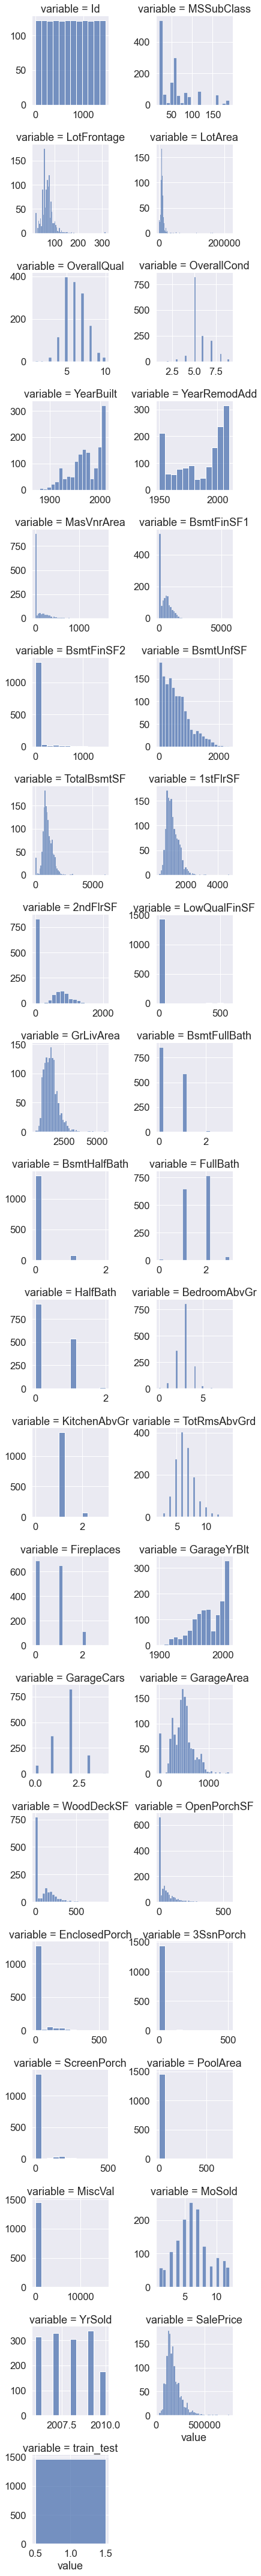

In [199]:
quant_df = pd.melt(train[quantitative])
g = sns.FacetGrid(quant_df, col_wrap=2, col="variable", sharex = False, sharey = False)
g.map(sns.histplot, "value")
plt.show()

In [200]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


/Users/benjamin.korke/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


### Qualitative
Missing Values:
* PoolQc
* MiscFeature 
* Alley
* Fence
* FireplaceQu

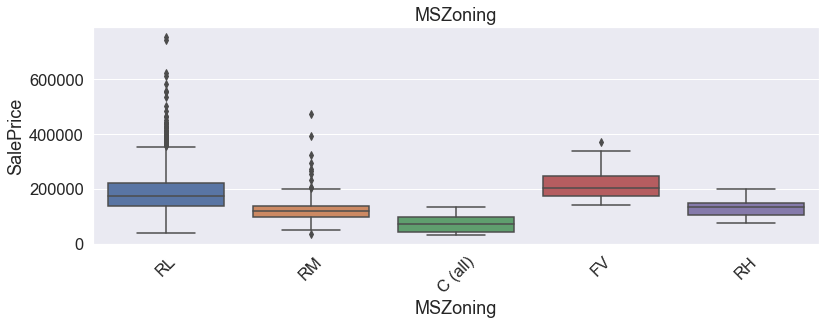

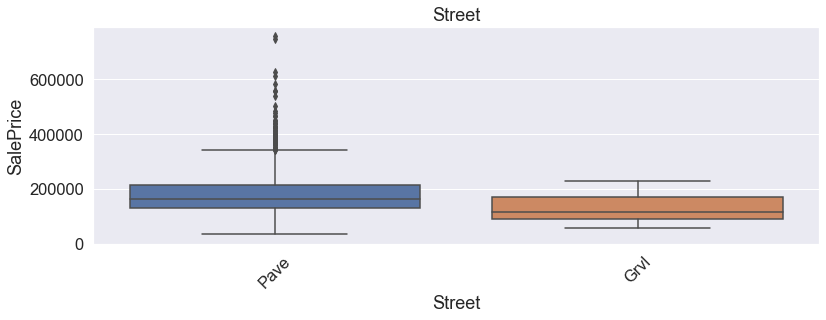

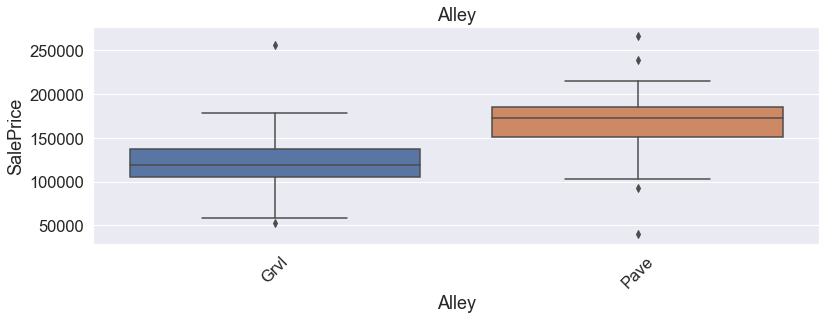

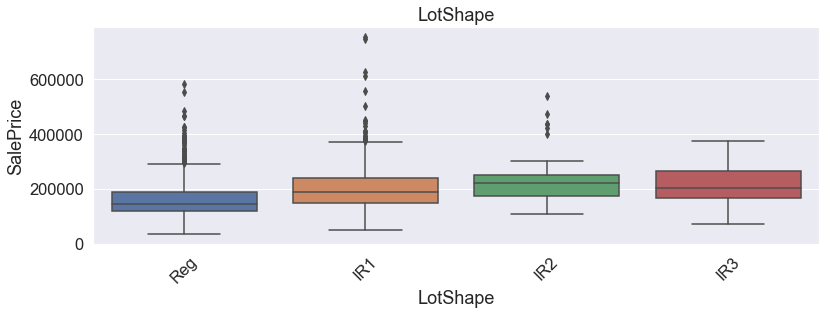

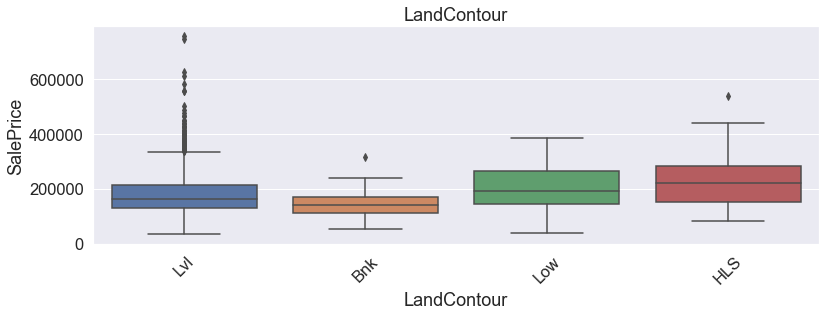

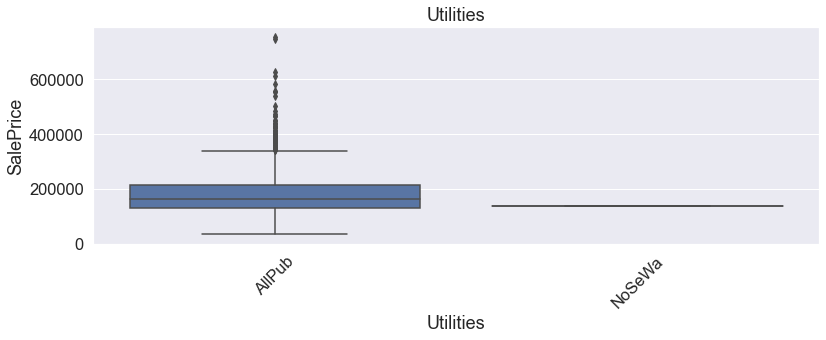

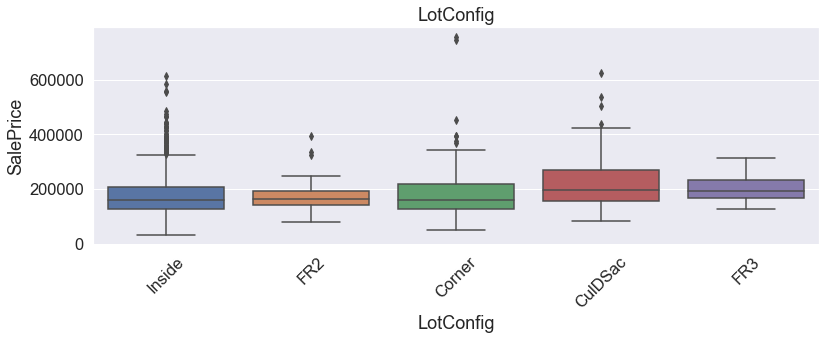

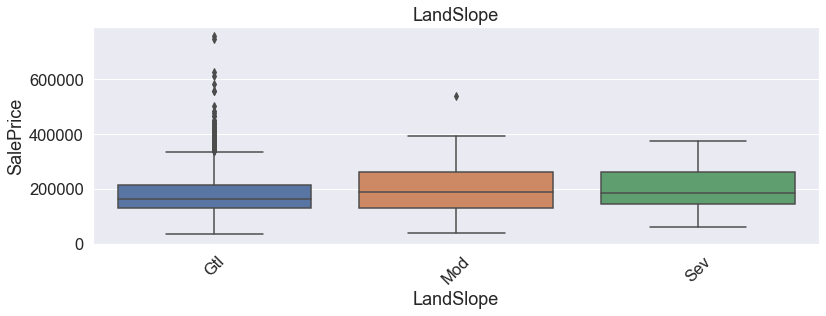

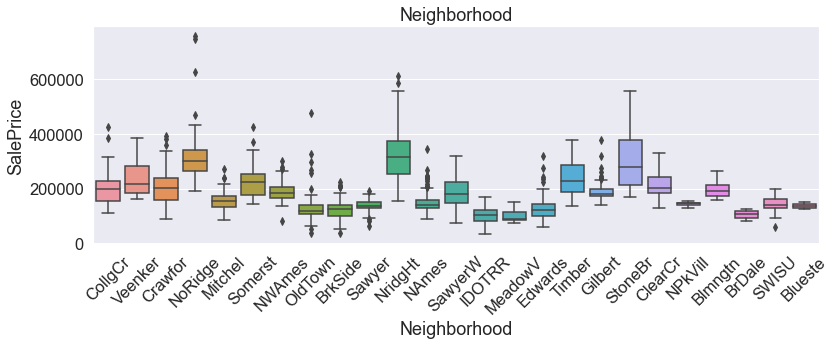

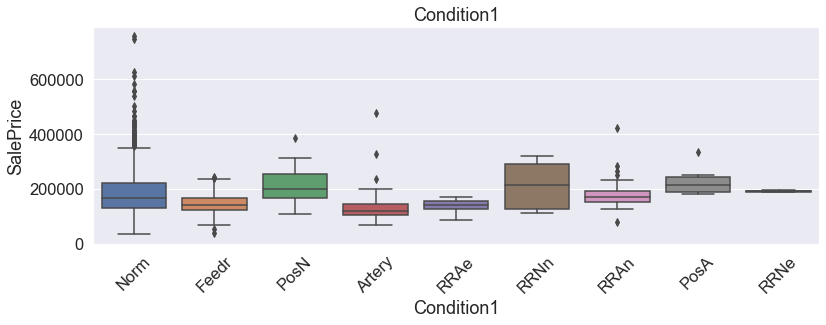

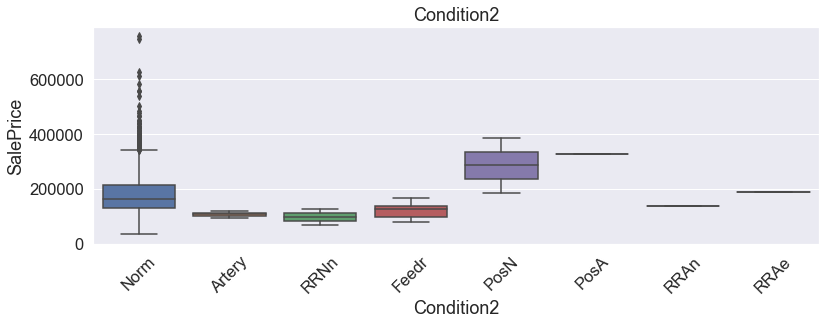

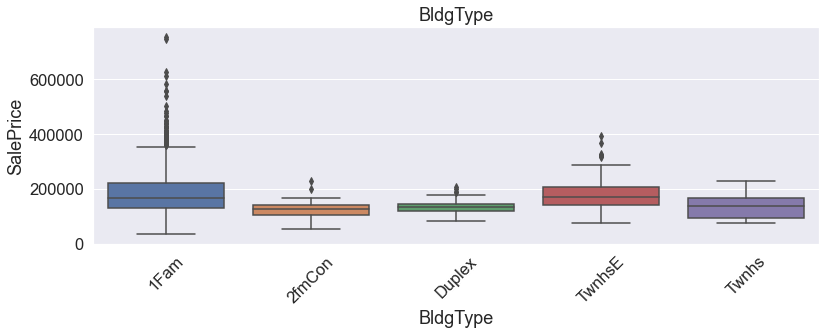

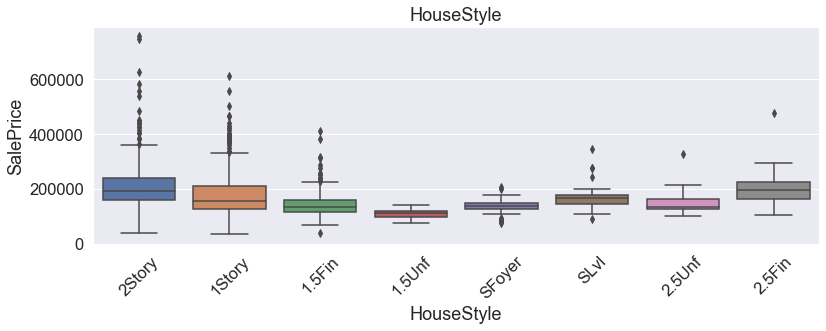

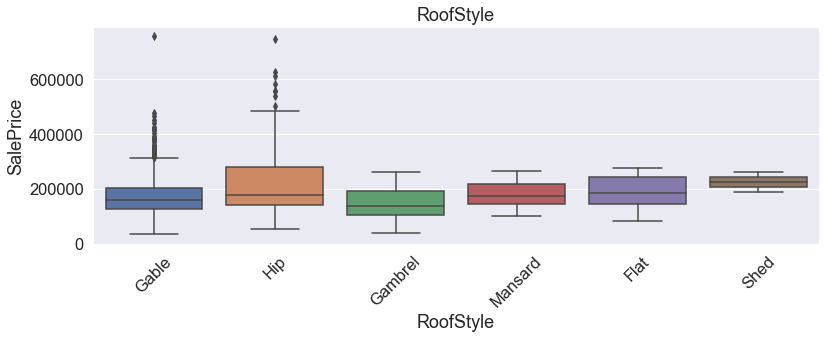

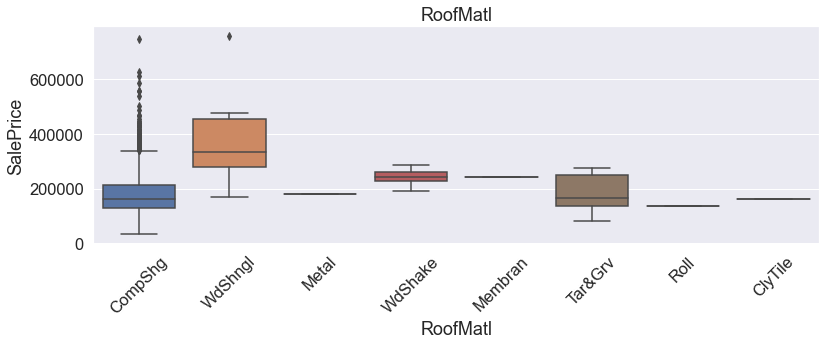

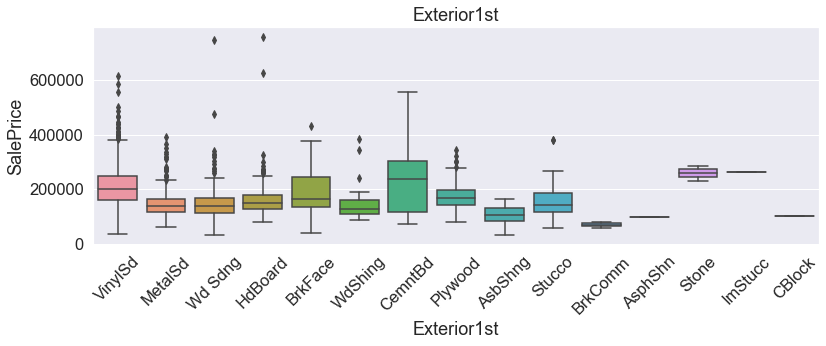

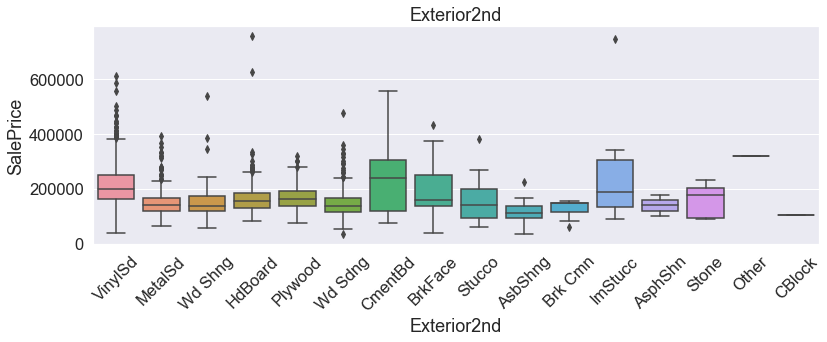

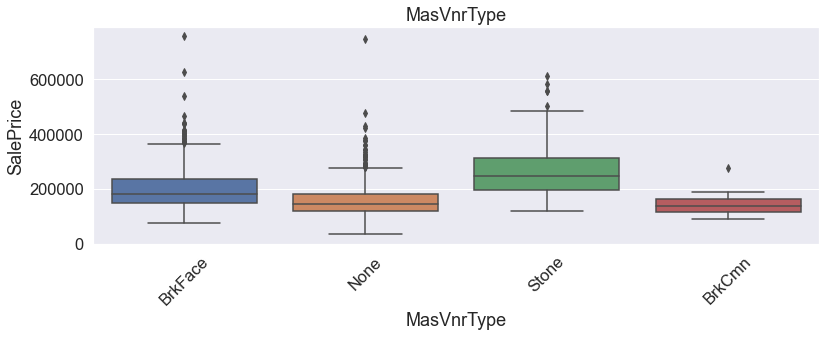

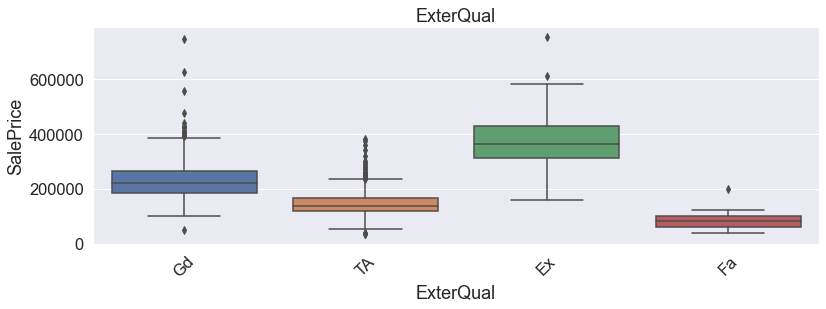

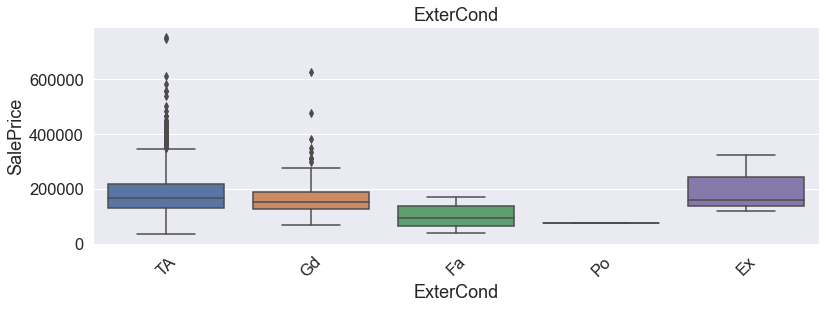

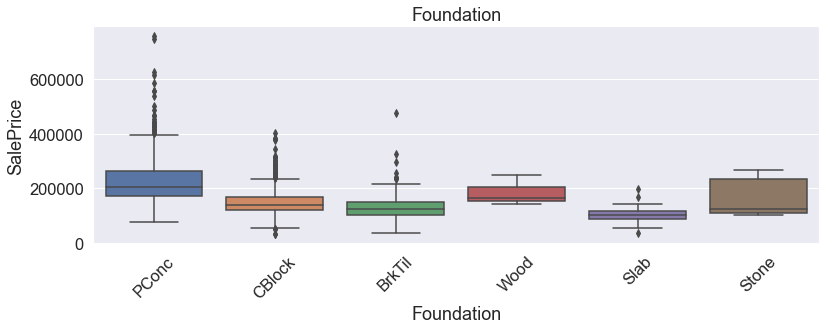

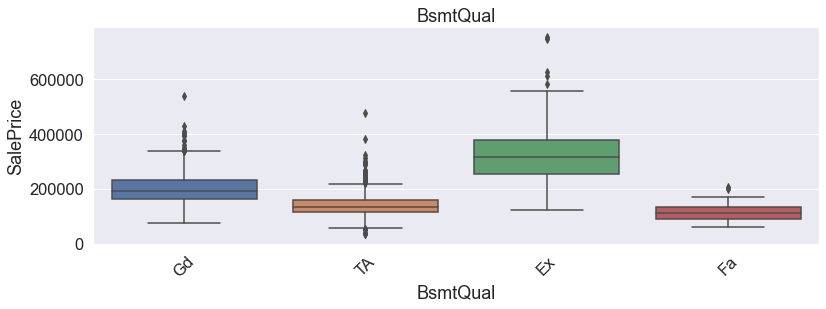

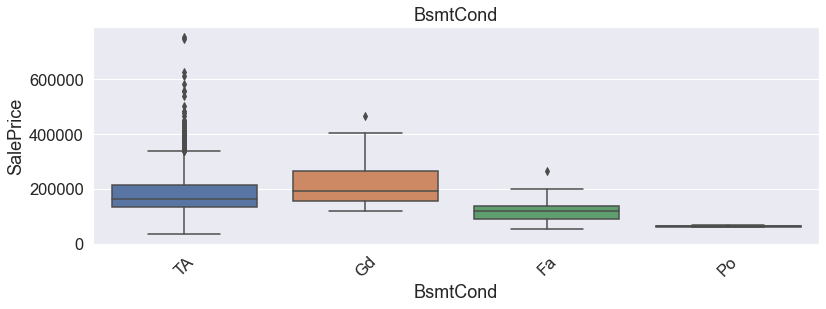

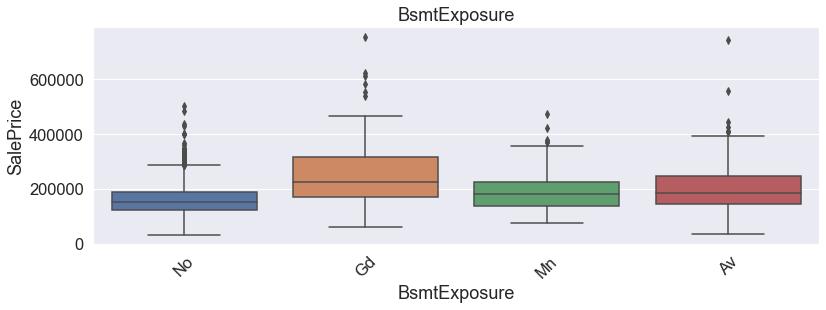

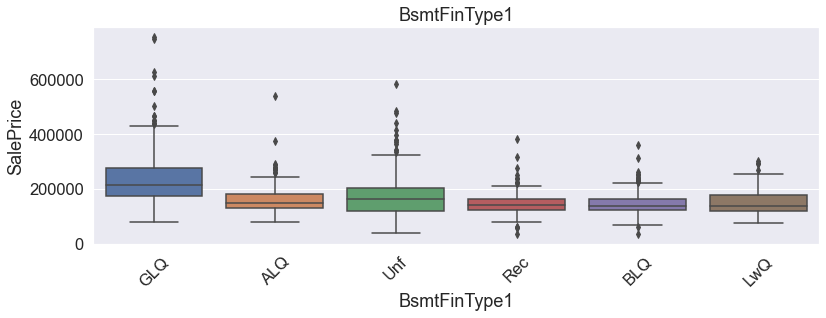

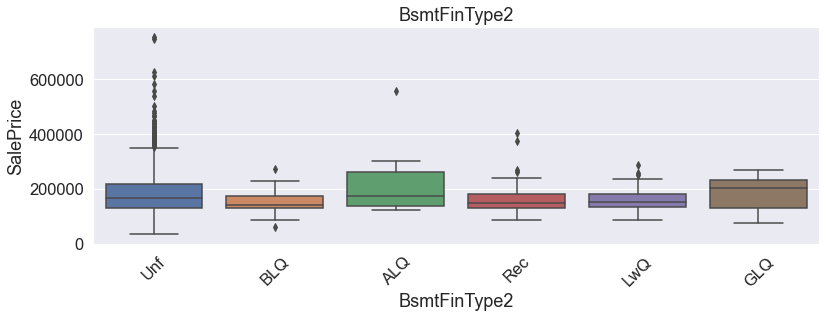

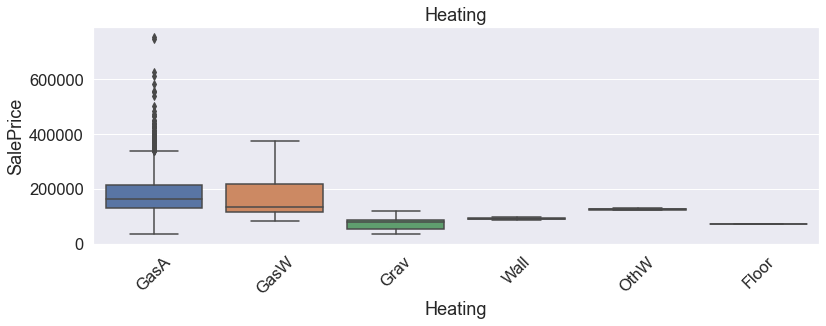

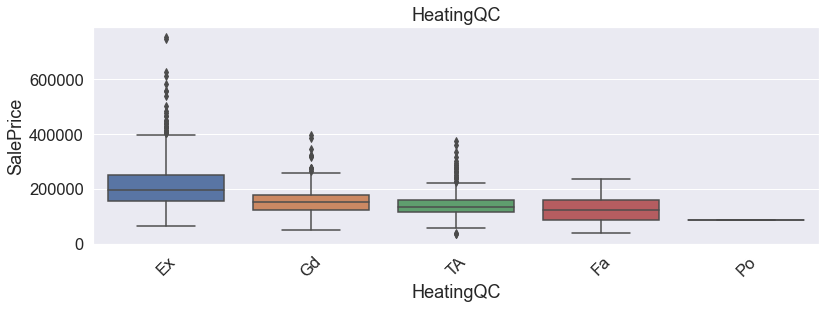

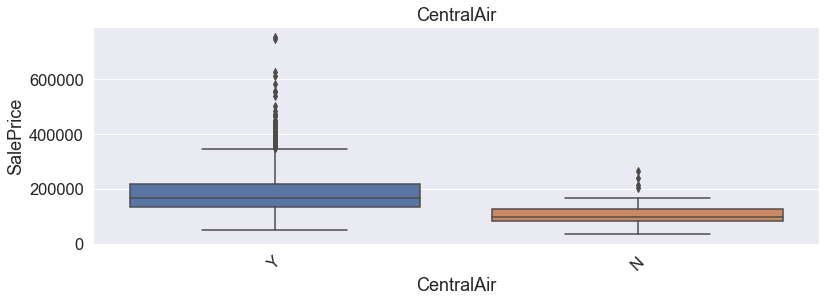

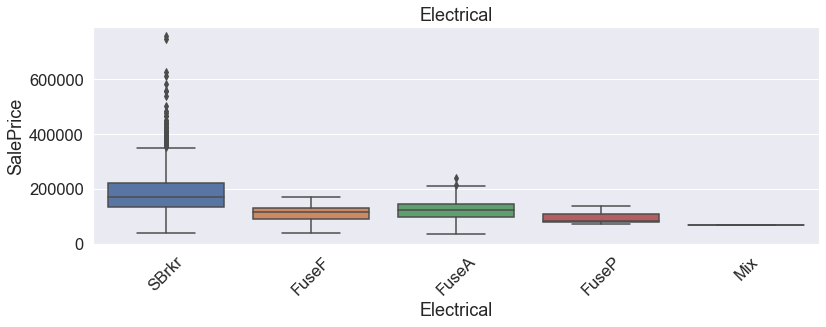

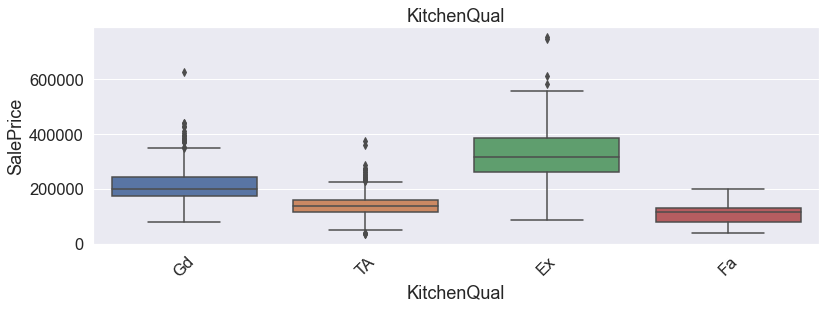

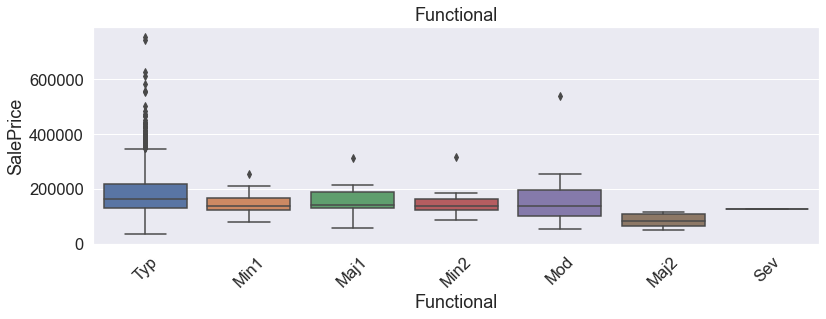

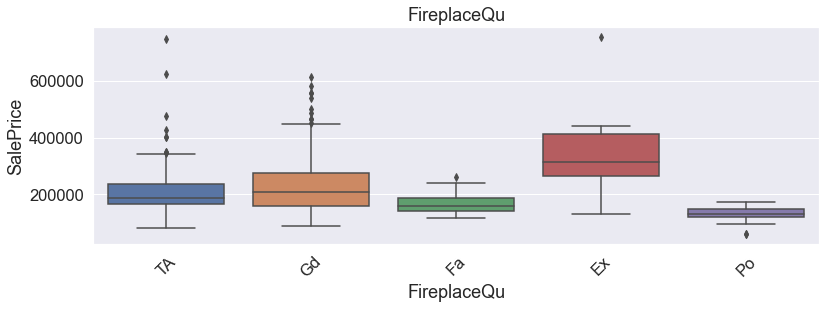

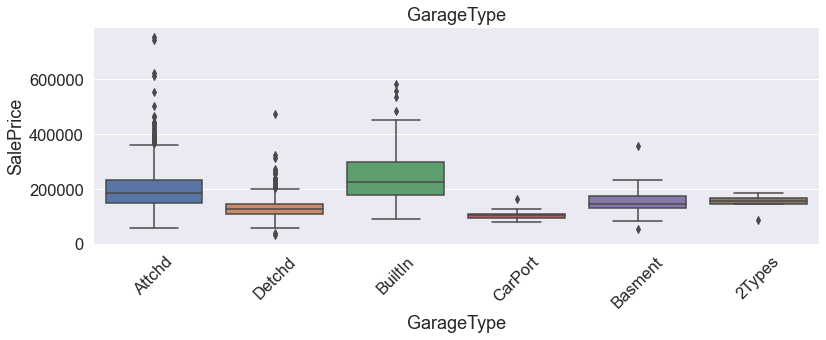

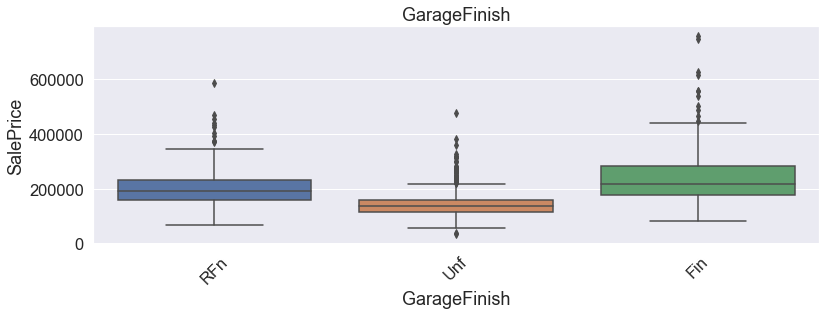

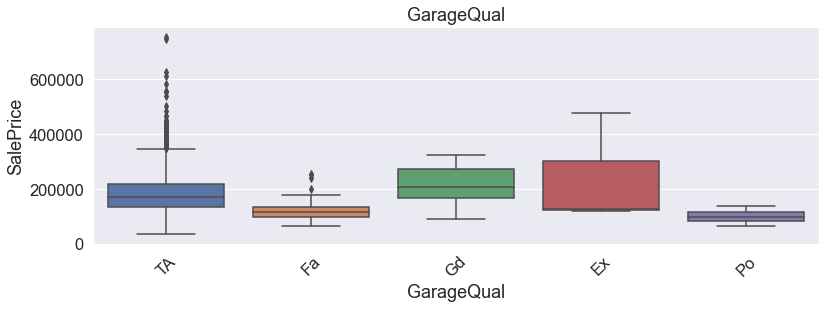

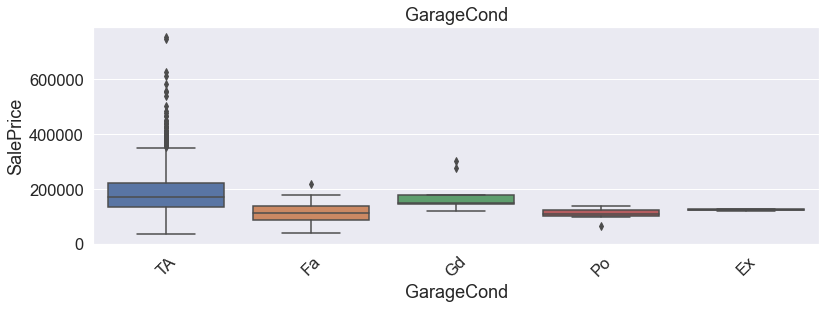

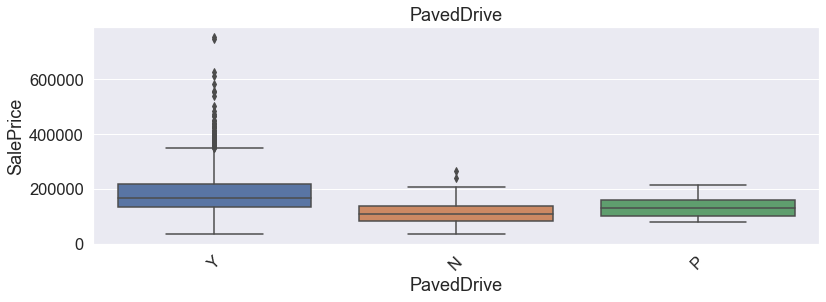

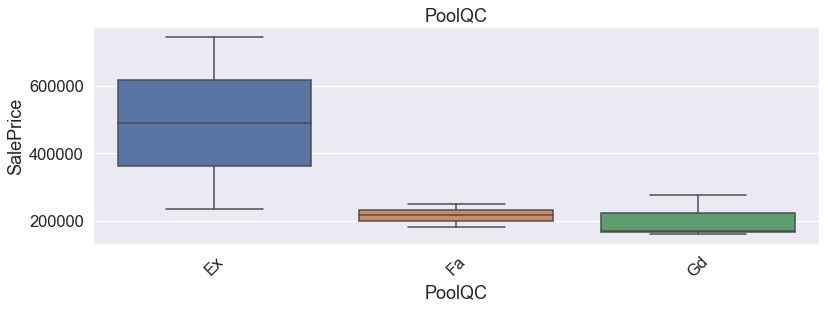

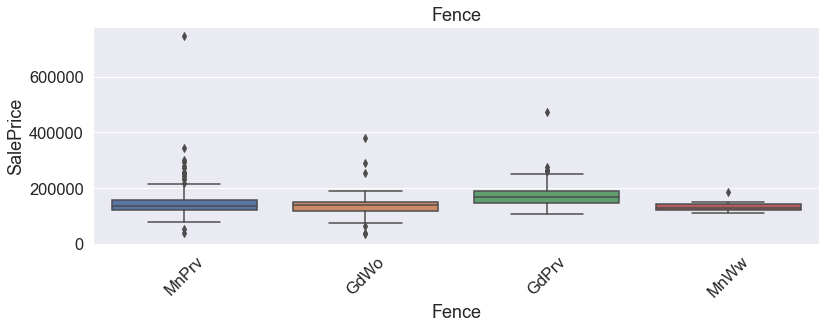

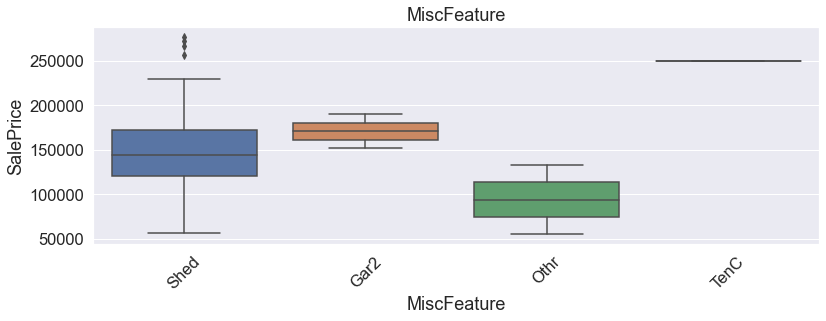

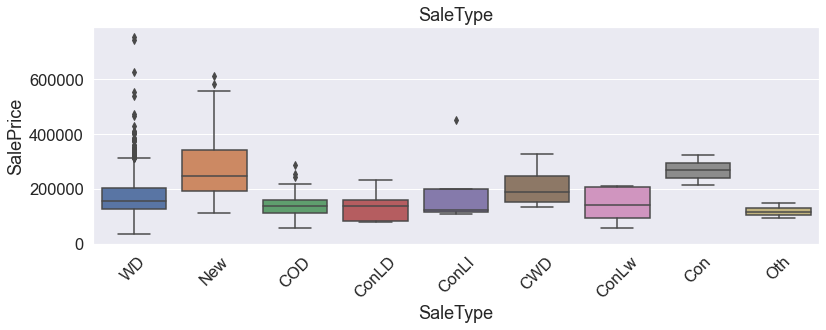

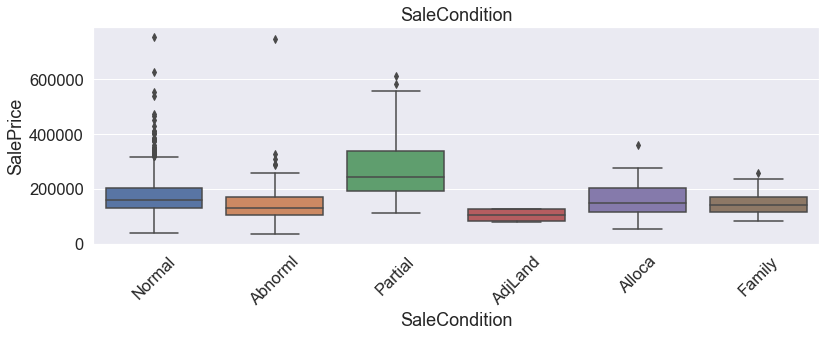

In [201]:
for c in qualitative:
    sns.boxplot(data = train, x = train[c], y = train["SalePrice"])
    plt.title(c)
    plt.xticks(rotation = 45)
    plt.show()
    

### Example for overlapping Data

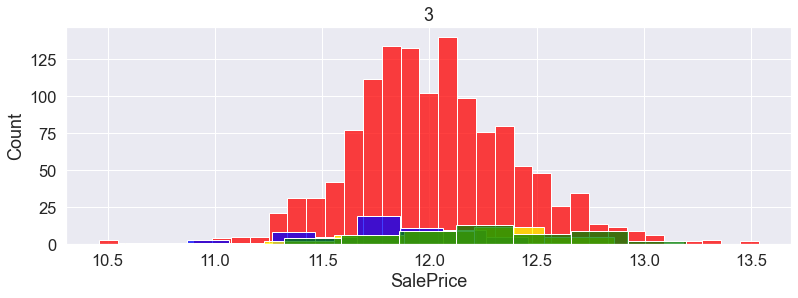

In [202]:
j = ["Lvl", "Bnk", "Low", "HLS"]
far = ["red", "blue","yellow", "green"]
fig, ax = plt.subplots()
for i, var in enumerate(j):
    df = train[train["LandContour"]==var]
    sns.histplot(np.log(df["SalePrice"]), color=far[i])
    plt.title(i)
    

As we can see it is not possible to distinguish different variations of a variable. So this will not give a lot Information to the model to perform a good regression.

# Feature Engeneering

In [203]:
#train["LivLotRatio"] = train.LotArea/train.GrLivArea
train["Spaciousness"] = (train["1stFlrSF"] + train["2ndFlrSF"] )/ train.TotRmsAbvGrd
train["TotalOutsideSF"] = train.apply(lambda x:
                                      x.WoodDeckSF + x.OpenPorchSF + x.EnclosedPorch +
                                      x["3SsnPorch"] + x.ScreenPorch, axis=1)

# Correlation

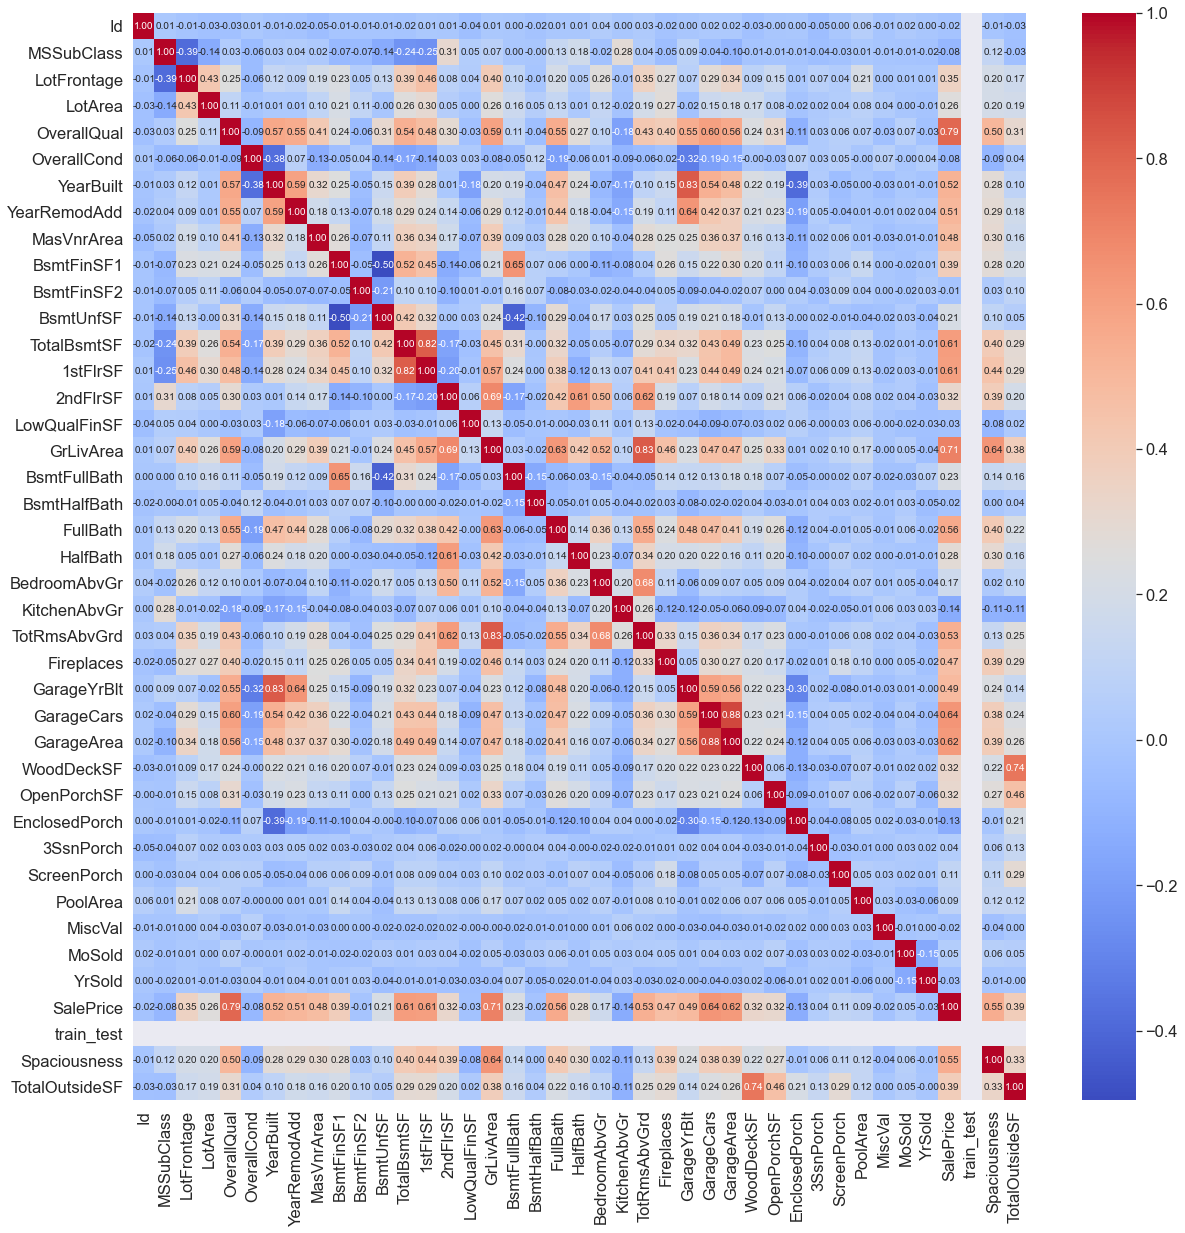

In [204]:
corr = train.corr()
f, ax = plt.subplots(figsize=(20, 20))

#cm = np.corrcoef(train[train.columns].values.T)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt = ".2f", annot_kws={'size': 10} )

plt.show()

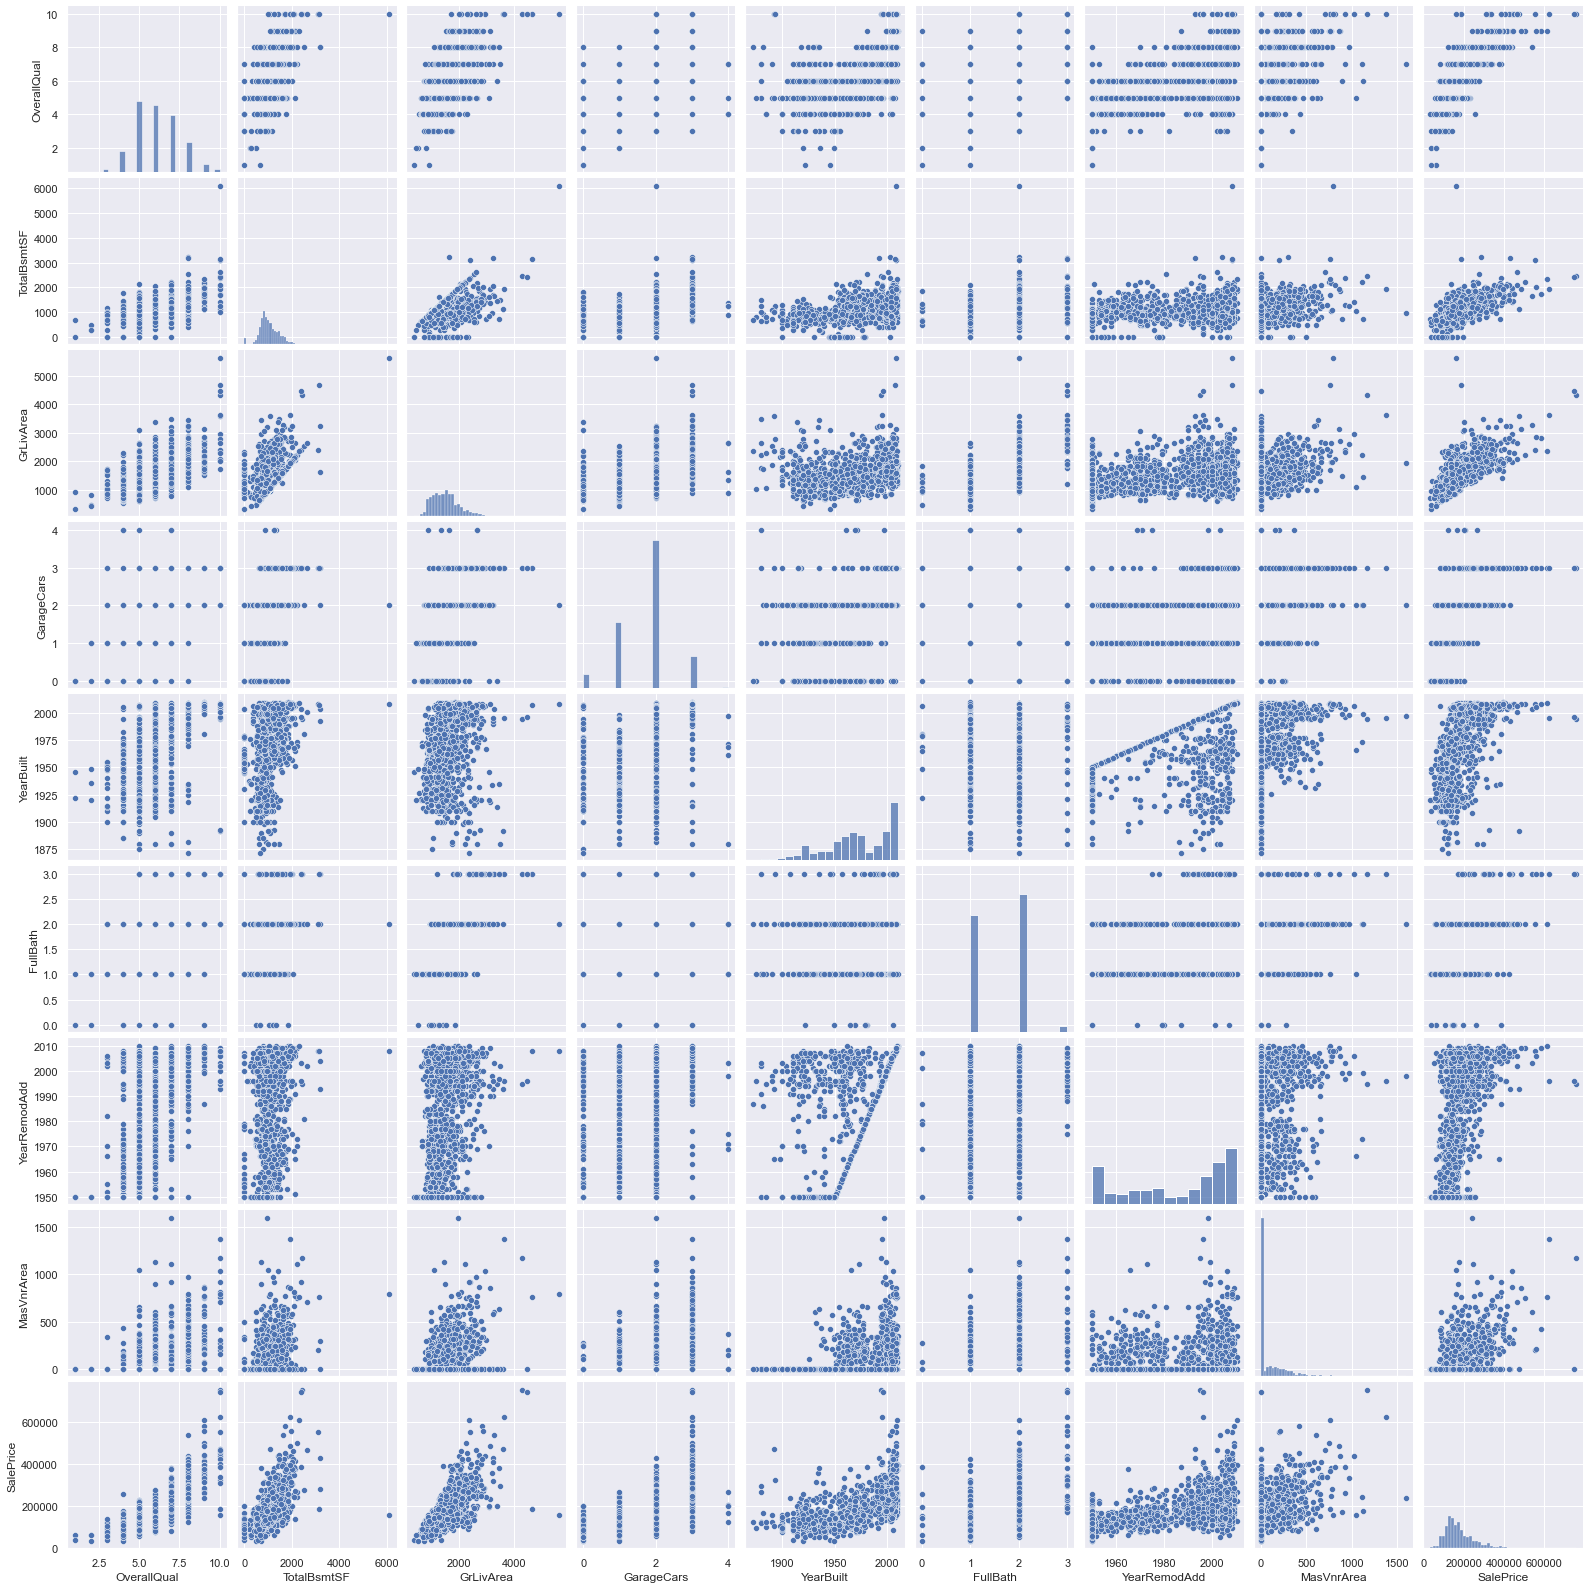

In [205]:

#scatterplot
# based on the correlation map we will check the correlation between saleprice and highly correlated variables
sns.set()
cols = ["OverallQual", "TotalBsmtSF", "GrLivArea",
        "GarageCars", "YearBuilt", "FullBath", "YearRemodAdd", "MasVnrArea", "SalePrice"]
sns.pairplot(train[cols], height = 2.5)

plt.show()

# Outliars
#### Check Variables for extrem Outliars
* GrLivArea
* TotalBsmtSF
* MasVnrArea

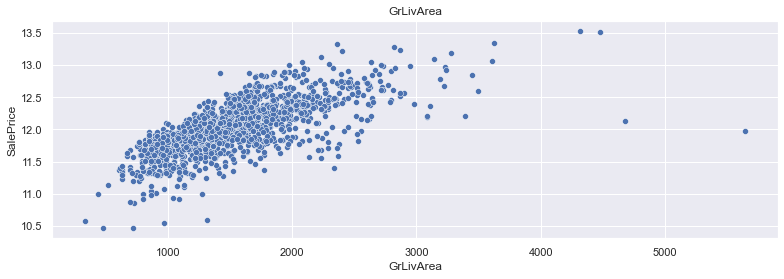

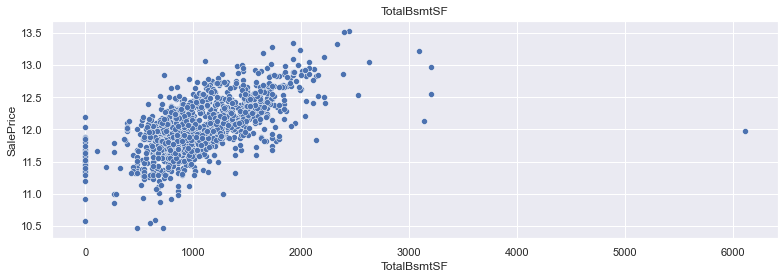

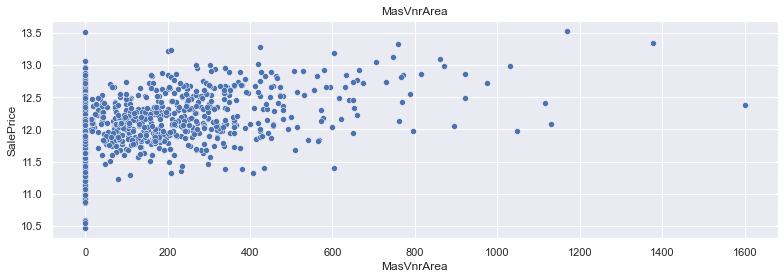

In [206]:

for i in ["GrLivArea", "TotalBsmtSF", "MasVnrArea"]:
    sns.scatterplot(data= train, x = i, y=np.log(train["SalePrice"]), size_norm=True)
    plt.title(i)
    plt.show()

# Summary what to do:
* fill NA's or drop Columns in train and test
* transformation SalePrice logarithmic or Johnson
* transform quantitative variables to normal distribution, none of them are normally distributed

#### Feature Engeneering Ideas
* Price per square for each neighborhood
* price per condition1 and condition 2
* PoolQC Excellent indicates a expensive House, but 98% missing Data
* SaleType is also interesting
* RoofMatl and RoofStyle is super interesting
* how to fill BsmtQual, BsmtCond, BsmtExposure
* Exterior1st, Exterior2nd maybe binning? Combination?
* Find in Foundation why it has so much Outliars, how can we Distinguish these Outliars!
* How to handle the 0 values in TotalBsmtSF


#### Correlation
* GrLivArea and TotRmsAbbGrd are like Twinbrothers
* GarageArea and GarageCars are like Twins
* GarageearBuilt and YearBuilt are twins
* TotalBsmtSF and 1stFlrSF are Twins

#### Important Correlation with SalePrice
* OverallQual, GrLivArea, GarageCars, TotalBsmtSF, YearBuilt, YearRemodAdd, MasVnrArea, FullBath


#### Drop Columns:
* Missing Value over 50%
* drop Utilities
* TotRmsAbvGrd, GarageArea, GarageYearBuilt, 1stFlrSF, PoolArea, MoSold, YrSold, MiscVal,LowQualFinSF, 3SsnPorch,, Screenporch,

#### maybe Drop:
* LandContour, LotShape, LotConfig

#### Outliars
* MasVnr>1500
* MasVnr== 0 and SalePrice>500k
* TotalBsmtSF > 3000
* GrLivArea > 4450

# Start

# Dropping Outliars and Concatting train and testset

In [207]:
train[train["GrLivArea"]>4000].GrLivArea

523     4676
691     4316
1182    4476
1298    5642
Name: GrLivArea, dtype: int64

In [208]:
# dropping outliars
#we have to drop that 1 missing value as row before merging train and test because somehow the data.drop() 
#will drop row ID 1380 (which is the actual missing value in electrical and Id= 2840, which is an error)
train.drop(train[train["Electrical"].isna()].index, inplace=True)


#data.drop(data.loc[data["SalePrice"]>13.5].index,inplace=True)
#there is one row in test data which has also over 4000 BsmtSF but 0 in column 2ndFlrSF
# so we will just drop the training datapoints
train.drop(train.loc[(train["GrLivArea"]>4500)].index,inplace=True)
#dropping outliars in BSMTSF and leaving that one datapoint because it fits in the regression model
train.drop(train.loc[train["TotalBsmtSF"]>3000].index, inplace=True)

train.drop(train.loc[train["MasVnrArea"]>1400].index, inplace=True)
data = pd.concat([train,test])
data.SalePrice.fillna(1, inplace=True)

# Drop Missing Values or Fill NAN's

In [209]:
data.isna().sum()

Id                   0
MSSubClass           0
MSZoning             4
LotFrontage        485
LotArea              0
Street               0
Alley             2715
LotShape             0
LandContour          0
Utilities            2
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
RoofStyle            0
RoofMatl             0
Exterior1st          1
Exterior2nd          1
MasVnrType          24
MasVnrArea          23
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual            81
BsmtCond            82
BsmtExposure        82
BsmtFinType1        79
BsmtFinSF1           1
BsmtFinType2        79
BsmtFinSF2           1
BsmtUnfSF            1
TotalBsmtSF          1
Heating              0
HeatingQC            0
CentralAir           0
Electrical           0
1stFlrSF   

### Manually Filling NAN's

In [210]:
data[(data["Neighborhood"]=="Edwards") & (data["BldgType"]=="Duplex")][["GarageQual", "OverallQual"]]

GarageQual  OverallQual
39          NaN            4
441         NaN            4
582         NaN            6
738         NaN            5
921         NaN            5
942         NaN            4
954         NaN            6
1011        NaN            5
379         NaN            5
380          TA            5
433         NaN            5
693         NaN            5
729         NaN            4
730         NaN            4
1087         TA            5
1092        NaN            4
1093        NaN            5
1399        NaN            6

In [211]:
def garage_qual(frame):
    if pd.isna(frame["GarageQual"]):
        if frame["OverallQual"]<3:
            return "Po"
        if frame["OverallQual"]<5:
            return "Fa"
        if frame["OverallQual"]<7:
            return "TA"
        if frame["OverallQual"]<9:
            return "Gd"
        if frame["OverallQual"]==10:
            return "Ex"
    return frame["GarageQual"]

In [212]:
#Fill Missing Values in GarageQual
data["GarageQual"] = data.apply(garage_qual, axis=1)

In [213]:
#data = data.replace({"GarageQual" : {"Po" : 2, "Fa" : 4, "TA" : 6, "Gd" : 8, "Ex" : 10},
 #                        "GarageCond" : {"Po" : 2, "Fa" : 4, "TA" : 6, "Gd" : 8, "Ex" : 10}})

In [214]:
data.FronTage = data["LotFrontage"].fillna(data.groupby("MSSubClass").LotFrontage.transform("mean"), inplace=True)
train.FronTage = train["LotFrontage"].fillna(train.groupby("MSSubClass").LotFrontage.transform("mean"), inplace=True)


In [215]:
data["GarageCars"].fillna(data.groupby("OverallQual").GarageCars.transform("mean"), inplace=True)
#data["GarageQual"].fillna(data.groupby("OverallQual").GarageQual.transform("mean"), inplace=True)
#data["GarageCond"].fillna(data.groupby("OverallQual").GarageCond.transform("mean"), inplace=True)

train["GarageCars"].fillna(train.groupby("OverallQual").GarageCars.transform("mean"), inplace=True)
#train["GarageQual"].fillna(train.groupby("OverallQual").GarageQual.transform("mean"), inplace=True)
#train["GarageCond"].fillna(train.groupby("OverallQual").GarageCond.transform("mean"), inplace=True)

In [216]:
data.KitchenQual.fillna("TA", inplace=True)
train.KitchenQual.fillna("TA", inplace=True)

### Fill the rest with mode

In [217]:
fillna = ["MasVnrArea", "MasVnrType", "Functional", "SaleType","BsmtFullBath","TotalBsmtSF", "MSZoning",
         "BsmtQual", "BsmtFinSF2", "BsmtFinSF1", "BsmtExposure" ,"BsmtCond", "Exterior1st", "Exterior2nd",
          "GarageArea", "BsmtUnfSF", "LotFrontage", "GarageQual", "GarageCond" ]

In [218]:
def filling(df, col):
    df[col].fillna(df[col].mode()[0], inplace=True)
    return df[col]

for i in fillna:
    data[i] = filling(data,i)
    train[i] = filling(train,i)

In [219]:
data.isna().sum()

Id                   0
MSSubClass           0
MSZoning             0
LotFrontage          0
LotArea              0
Street               0
Alley             2715
LotShape             0
LandContour          0
Utilities            2
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
MasVnrType           0
MasVnrArea           0
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual             0
BsmtCond             0
BsmtExposure         0
BsmtFinType1        79
BsmtFinSF1           0
BsmtFinType2        79
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
Heating              0
HeatingQC            0
CentralAir           0
Electrical           0
1stFlrSF   

# Feature Engeneering

In [220]:
data_1 = data.copy()
data_1

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [223]:
#data["LivLotRatio"] = data.GrLivArea / data.LotArea
data_1["Spaciousness"] = (data_1["1stFlrSF"] + data_1["2ndFlrSF"] )/ data_1.TotRmsAbvGrd
data_1["TotalOutsideSF"] = data_1.apply(lambda x:
                                      x.WoodDeckSF + x.OpenPorchSF + x.EnclosedPorch +
                                      x["3SsnPorch"] + x.ScreenPorch, axis=1)

#count porch of a house
data_1["PorchTypes"] = data_1[["WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
                        "3SsnPorch", "ScreenPorch"]].gt(0.0).sum(axis=1)

In [224]:
# One-hot encode BldgType. Use `prefix="Bldg"` in `get_dummies`
#df_new = pd.get_dummies(data_1["BldgType"], prefix="Bldg")
# Multiply

#df_new = df_new.mul(data_1.GrLivArea, axis=0)
#data_1 = data_1.join(df_new )

In [225]:
#data_1.drop_duplicates(subset="Id", keep="first", inplace=True)

In [226]:
# addding new feature before dropping 1stfloor
data_1["grliv_floors"] = data_1["GrLivArea"] / data_1["1stFlrSF"]



### Numeric to Categoric

In [227]:
# Some numerical features are actually really categories
data_1 = data_1.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                    "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

### Categoric to numeric

In [232]:
data_1 = data_1.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       #"BsmtCond" : {"No" : 0, "Po" : 2, "Fa" : 4, "TA" : 6, "Gd" : 8, "Ex" : 10},
                       #"BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       #"BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                        #                 "ALQ" : 5, "GLQ" : 6},
                       #"BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                        #                 "ALQ" : 5, "GLQ" : 6},
                       #"BsmtQual" : {"No" : 0, "Po" : 2, "Fa" : 4, "TA" : 6, "Gd" : 8, "Ex" : 10},
                       #"ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       #"ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       #"FireplaceQu" : {"No" : 0, "Po" : 2, "Fa" : 4, "TA" : 6, "Gd" : 8, "Ex" : 10},
                       #"Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                        #               "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       # "BldgType" : {"Twnhs": 5.3, "Duplex": 5.65, "2fmCon":5.9, "1Fam":6.04 , "TwngsE": 6.06 },
                     
                        #"Roofstyle": {"Shed" : 4.9, "Gambrel":5.8, "Gable": 5.91, "Mansard": 7.7, "Flat": 8},
                         #"GarageQual" : {},
                         #"GarageCond" : {},
                         "YrSold" : {2006: "yr_2006" , 2007: "yr_2007", 2008: "yr_2009", 2010: "yr_2010"},
                       
                       #"HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 5, "Gd" : 8, "Ex" : 10},
                       #"KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 5, "Gd" : 8, "Ex" : 10},
                       
                       #"LotShape" : {"IR3" : 1, "IR2" : 1, "IR1" : 3, "Reg" : 4},
                       #"PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}})
                       #"Street" : {"Grvl" : 1, "Pave" : 2}})

In [233]:
data_1

Id MSSubClass MSZoning  LotFrontage  LotArea Street  Alley LotShape  \
0        1       SC60       RL         65.0     8450   Pave    NaN      Reg   
1        2       SC20       RL         80.0     9600   Pave    NaN      Reg   
2        3       SC60       RL         68.0    11250   Pave    NaN      IR1   
3        4       SC70       RL         60.0     9550   Pave    NaN      IR1   
4        5       SC60       RL         84.0    14260   Pave    NaN      IR1   
...    ...        ...      ...          ...      ...    ...    ...      ...   
1454  2915      SC160       RM         21.0     1936   Pave    NaN      Reg   
1455  2916      SC160       RM         21.0     1894   Pave    NaN      Reg   
1456  2917       SC20       RL        160.0    20000   Pave    NaN      Reg   
1457  2918       SC85       RL         62.0    10441   Pave    NaN      Reg   
1458  2919       SC60       RL         74.0     9627   Pave    NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [234]:
data_1["car_qm"] = data_1.apply(lambda x: x.GarageCars / x.GarageArea 
                              if  x.GarageArea > 0 else x.GarageCars, axis=1)
data_1["blg_roof"] = data_1.BldgType + "_" + data_1.RoofStyle

# Binning

In [235]:
def year_binning(x):
    if x == 2010:
        return "brand_new"
    
    elif x<2010 and x>2007:
        return "new"
    
    elif x<1999 and x>1982:
        return "new_cheap"
    
    elif x<1982 and x>1935:
        return "mid_old"
    
    elif x<1936 and x>1931:
        return "old"
    
    elif x<1932 and x>1903:
        return "old_exp"
    
    else:
        return "very_old"
data_1["YearBuilt"] = data_1["YearBuilt"].apply(year_binning)
data_1["YearRemodAdd"] = data_1["YearRemodAdd"].apply(year_binning)



### Drop Columns with missing data

In [236]:
#for dropping colums because of missing values in the training data set
#drop whole columns
total = data_1.isnull().sum().sort_values(ascending=False)
percent = data_1.isnull().sum()/data.isnull().count().sort_values(ascending=False)
missing_data_total = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
data_1.drop(missing_data_total[missing_data_total["Total"]>1].index, axis=1, inplace=True)

In [237]:
#for dropping colums because of missing values in the training data set
#drop whole columns
total = train.isnull().sum().sort_values(ascending=False)
percent = data.isnull().sum()/train.isnull().count().sort_values(ascending=False)
missing_data_total = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
train.drop(missing_data_total[missing_data_total["Total"]>1].index, axis=1, inplace=True)

# Mutual Information

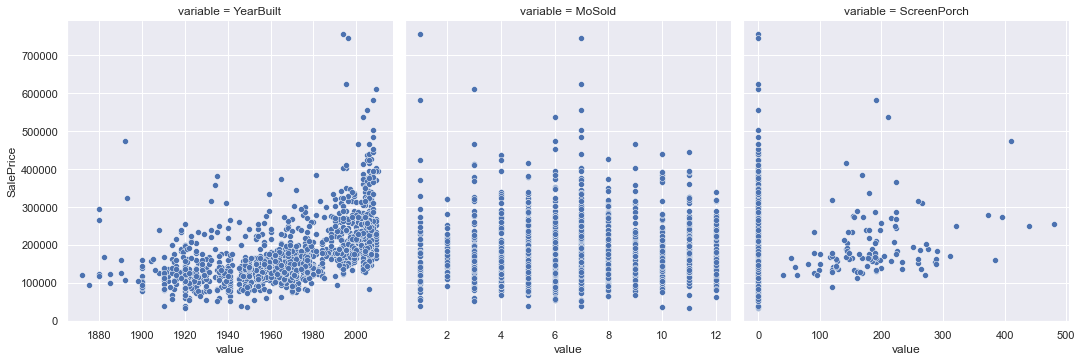

In [238]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=train.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
)

from sklearn.feature_selection import mutual_info_regression

# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X = train.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)

mutual_info_regression([train["MasVnrArea"]], train["SalePrice"], [["MasVnrArea"]])

# Relationship between 2 variables and SalePrice

feature = "GrLivArea"
for i in qualitative:
    sns.lmplot(
        x=feature, y="SalePrice", hue=i, col=i,
        data=train, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
    );
    plt.show()

feature = "MoSold"
for i in qualitative:
    sns.lmplot(
        x=feature, y="SalePrice", hue=i, col=i,
        data=train, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
    );
    plt.show()

feature = "TotalBsmtSF"
for i in qualitative:
    sns.lmplot(
        x=feature, y="SalePrice", hue=i, col=i,
        data=train, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
    );
    plt.show()

feature = "MasVnrArea"
for i in qualitative:
    sns.lmplot(
        x=feature, y="SalePrice", hue=i, col=i,
        data=train, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
    );
    plt.show()

### Drop Columns that do not correlate with SalePrice

In [239]:
data_1.drop(["EnclosedPorch", "3SsnPorch", "ScreenPorch",
           "PoolArea", "MiscVal", "YrSold", "2ndFlrSF", "BsmtFinSF2", "LowQualFinSF"], axis=1, inplace=True)

corr = data.corr()
k = 80 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice']
df_cols_drop = cols.reset_index()

#drop columns with low correlation
cols_to_drop = list(df_cols_drop[(df_cols_drop["SalePrice"]<0.06) & (df_cols_drop["SalePrice"]>-0.07)]["index"])
data.drop(cols_to_drop, axis=1, inplace=True)

### Drop Columns with multicollinearity

In [240]:

#dropping
# , "GarageArea", "1stFlrSF",
data_1.drop(["TotRmsAbvGrd","Id", "ExterCond" ], axis=1, inplace=True) 

# Checking normal Distribution of SalePrice and quantitative Data

/Users/benjamin.korke/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

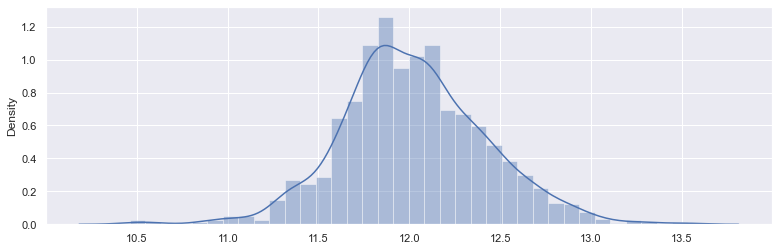

In [241]:
train["SalePrice"] = np.log(train["SalePrice"])
data_1["SalePrice"] = np.log(data_1["SalePrice"])
sns.distplot(x = train["SalePrice"])

### Mean Average square price for each neighborhood

In [242]:
#neighbor_df = data.groupby("Neighborhood").SalePrice.mean()
#neighbor_df = neighbor_df.reset_index()
#neighbor_df = neighbor_df.rename(columns = {"SalePrice" : "Square_Price"})
#data = pd.merge(data, neighbor_df, on = "Neighborhood", how= "inner")
#data

### logarithmic transformation for normal distribution

In [243]:
data_1

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          SC60       RL         65.0     8450   Pave      Reg         Lvl   
1          SC20       RL         80.0     9600   Pave      Reg         Lvl   
2          SC60       RL         68.0    11250   Pave      IR1         Lvl   
3          SC70       RL         60.0     9550   Pave      IR1         Lvl   
4          SC60       RL         84.0    14260   Pave      IR1         Lvl   
...         ...      ...          ...      ...    ...      ...         ...   
1454      SC160       RM         21.0     1936   Pave      Reg         Lvl   
1455      SC160       RM         21.0     1894   Pave      Reg         Lvl   
1456       SC20       RL        160.0    20000   Pave      Reg         Lvl   
1457       SC85       RL         62.0    10441   Pave      Reg         Lvl   
1458       SC60       RL         74.0     9627   Pave      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3       Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          FR2       Gtl      NoRidge       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
1454    Inside       Gtl      MeadowV       Norm       Norm    Twnhs   
1455    Inside       Gtl      MeadowV       Norm       Norm   TwnhsE   
1456    Inside       Gtl      Mitchel       Norm       Norm     1Fam   
1457    Inside       Gtl      Mitchel       Norm       Norm     1Fam   
1458    Inside       Mod      Mitchel       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt YearRemodAdd RoofStyle  \
0        2Story            7            5   very_old     very_old     Gable   
1        1Story            6            8    mid_old      mid_old     Gable   
2        2Story            7            5   very_old     very_old     Gable   
3        2Story            7            5    old_exp      mid_old     Gable   
4        2Story            8            5   very_old     very_old     Gable   
...         ...          ...          ...        ...          ...       ...   
1454     2Story            4            7    mid_old      mid_old     Gable   
1455     2Story            4            5    mid_old      mid_old     Gable   
1456     1Story            5            7    mid_old    new_cheap     Gable   
1457     SFoyer            5            5  new_cheap    new_cheap     Gable   
1458     2Story            7            5  new_cheap    new_cheap     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     CompShg     MetalSd     MetalSd       None         0.0        TA   
2     CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   
...       ...         ...         ...        ...         ...       ...   
1454  CompShg     CemntBd     CmentBd       None         0.0        TA   
1455  CompShg     CemntBd     CmentBd       None         0.0        TA   
1456  CompShg     VinylSd     VinylSd       None         0.0        TA   
1457  CompShg     HdBoard     Wd Shng       None         0.0        TA   
1458  CompShg     HdBoard     HdBoard    BrkFace        94.0        TA   

     Foundation BsmtQual BsmtCond BsmtExposure  BsmtFinSF1  BsmtUnfSF  \
0         PConc       Gd       TA           No       706.0      150.0   
1        CBlock       Gd       TA           Gd       978.0      284.0   
2         PConc       Gd       TA           Mn       486.0      434.0   
3        BrkTil       TA       Gd           No       216.0      540.0   


In [244]:
#normalize quantitate Features
quant_list_log = ["LotArea", "BsmtUnfSF", "TotalBsmtSF", "GrLivArea","WoodDeckSF",
                  "OpenPorchSF", "grliv_floors", "MasVnrArea",
                  "LotFrontage", "GarageArea", "1stFlrSF", "TotalOutsideSF", "Spaciousness"]

In [245]:
data_1[quant_list_log] = np.log1p(data_1[quant_list_log])

In [256]:
scaler = StandardScaler()
scale_list = [  "OverallQual", 
            "BsmtFullBath", "FullBath", "HalfBath" , "BedroomAbvGr",
             "Fireplaces","GarageCars", "OverallCond", "KitchenAbvGr" , "car_qm", "PorchTypes"]

data_1[scale_list] = scaler.fit_transform(data_1[scale_list])
#"BsmtQual", "BsmtCond", "Functional",  "KitchenQual",PavedDrive","HeatingQC",

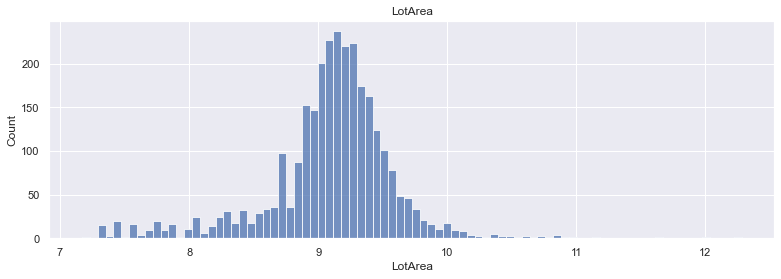

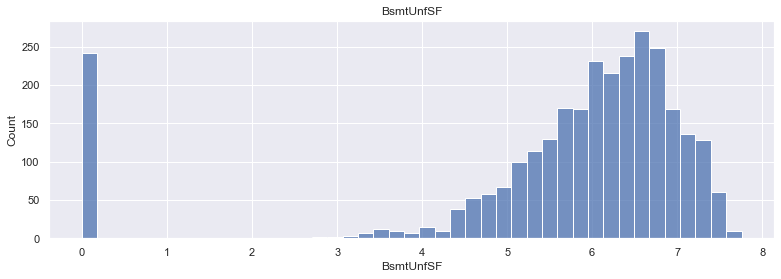

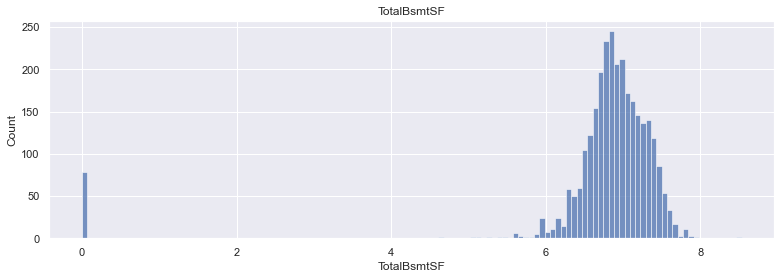

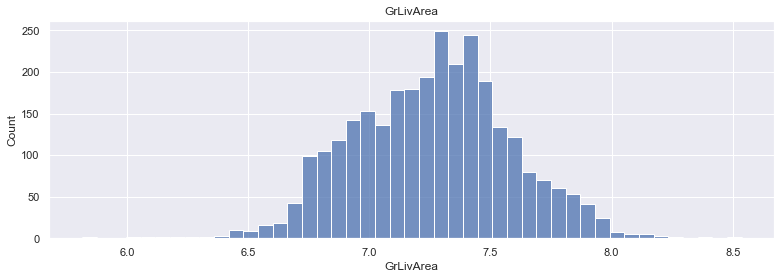

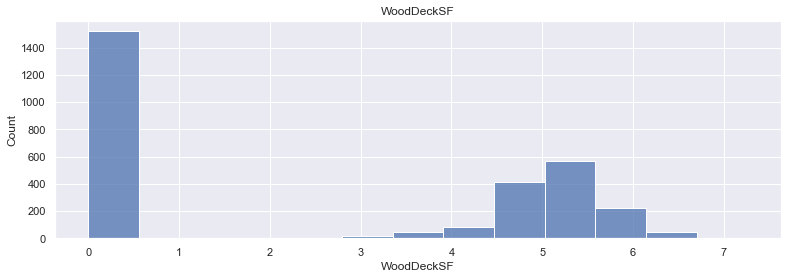

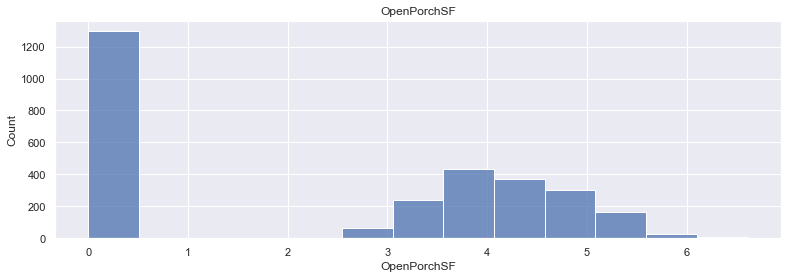

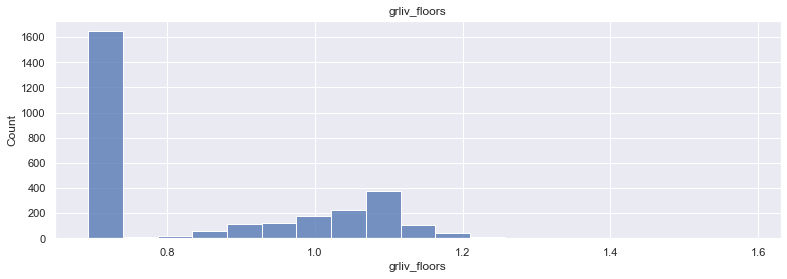

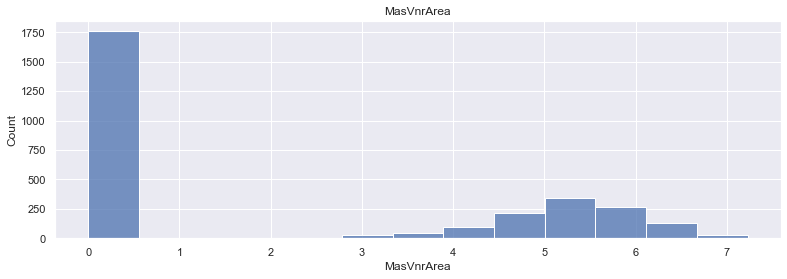

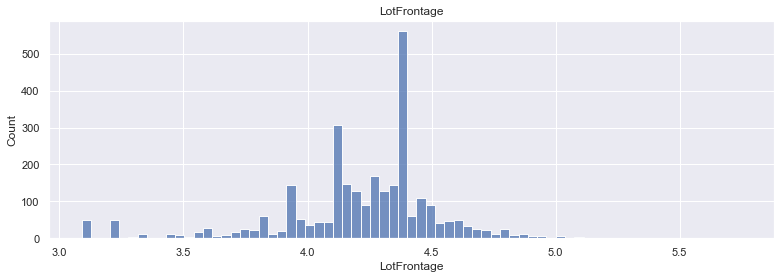

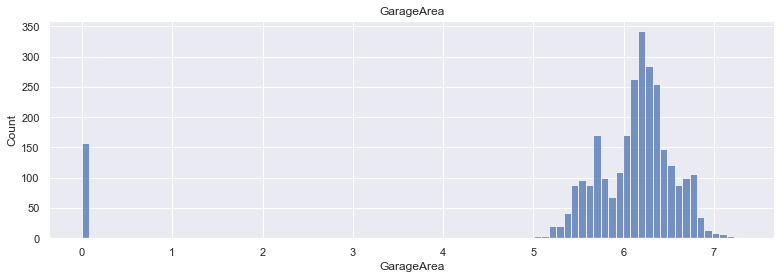

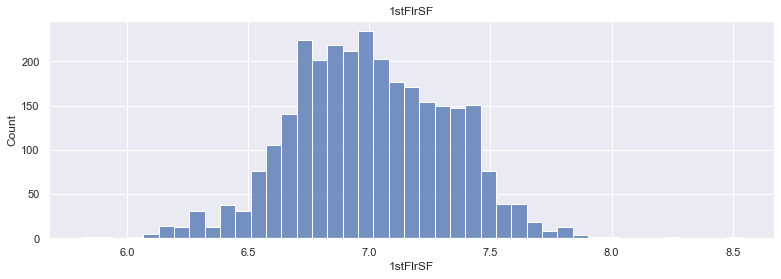

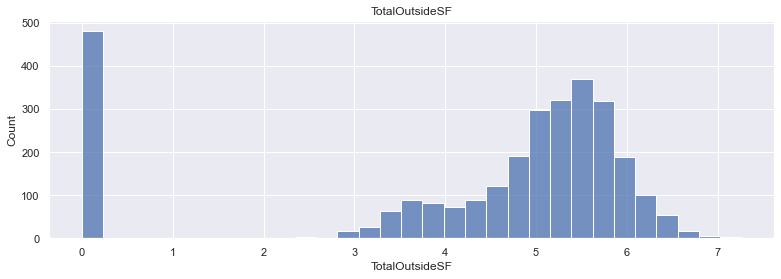

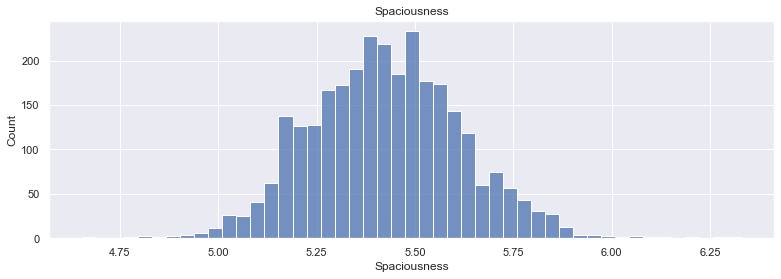

In [257]:
for i in quant_list_log:
    sns.histplot(data_1[i])
    plt.title(i)
    plt.show()

# Preparing train and test data

In [163]:
data_1.drop("GarageArea", axis=1, inplace=True)

In [164]:
data_dummies = pd.get_dummies(data_1)

In [165]:
train_dummies = data_dummies[data_dummies["train_test"]==1]
test_dummies= data_dummies[data_dummies["train_test"]==0]
test_dummies.drop("SalePrice", axis=1, inplace=True)
y_train = train_dummies["SalePrice"]
train_dummies.drop("SalePrice", axis=1, inplace=True)

/Users/benjamin.korke/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [166]:
train_dummies.drop("train_test", axis=1, inplace=True)
test_dummies.drop("train_test", axis=1, inplace=True)

In [167]:
X_train = train_dummies
X_test = test_dummies
print(X_train.shape)
print(X_test.shape)

(1453, 274)
(1459, 274)


In [168]:
X_train

LotFrontage   LotArea    Street  LotShape  OverallQual  OverallCond  \
0        4.189655  9.042040  0.064327  0.646420     0.652265    -0.508051   
2        4.394449  9.169623  0.064327  0.646420    -0.059652     2.185111   
4        4.234107  9.328212  0.064327 -0.875306     0.652265    -0.508051   
6        4.110874  9.164401  0.064327 -0.875306     0.652265    -0.508051   
8        4.442651  9.565284  0.064327 -0.875306     1.364183    -0.508051   
...           ...       ...       ...       ...          ...          ...   
2903     4.143135  8.976894  0.064327  0.646420    -0.059652    -0.508051   
2905     4.454347  9.486152  0.064327  0.646420    -0.059652     0.389670   
2907     4.204693  9.109746  0.064327  0.646420     0.652265     3.082832   
2909     4.234107  9.181735  0.064327  0.646420    -0.771570     0.389670   
2911     4.330733  9.204121  0.064327  0.646420    -0.771570     0.389670   

      MasVnrArea  ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  \
0       5.283204   1.047029  0.635522 -0.009452     -0.626741    6.561031   
2       0.000000  -0.682380  0.635522 -0.009452      2.264076    6.886532   
4       5.093750   1.047029  0.635522 -0.009452      0.336865    6.188264   
6       0.000000  -0.682380 -0.804664  3.431253     -0.626741    5.379897   
8       5.860786   1.047029  0.635522 -0.009452      1.300471    6.486161   
...          ...        ...       ...       ...           ...         ...   
2903    0.000000  -0.682380  0.635522 -0.009452     -0.626741    0.000000   
2905    4.787492  -0.682380  0.635522 -0.009452     -0.626741    6.673298   
2907    0.000000   2.776438 -0.804664  3.431253     -0.626741    5.620401   
2909    0.000000  -0.682380 -0.804664 -0.009452      0.336865    3.912023   
2911    0.000000   1.047029 -0.804664 -0.009452     -0.626741    6.722630   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0      5.017280     6.753438  6.753438   7.444833      1.090801  0.785769   
2      5.652489     7.141245  7.141245   7.141245     -0.818101  0.785769   
4      6.075346     6.825460  6.825460   7.488294      1.090801  0.785769   
6      6.293419     6.629363  6.869014   7.448916      1.090801 -1.025917   
8      6.196444     7.044033  7.044033   7.695758      1.090801  0.785769   
...         ...          ...       ...        ...           ...       ...   
2903   6.860664     6.860664  6.860664   7.407318     -0.818101  0.785769   
2905   6.380123     7.341484  7.637234   7.637234      1.090801  0.785769   
2907   6.777647     7.050123  7.080868   7.758333     -0.818101  0.785769   
2909   0.000000     6.983790  6.983790   6.983790      1.090801 -1.025917   
2911   4.919981     7.136483  7.136483   7.136483      1.090801 -1.025917   

      HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  \
0     1.233681      0.170223     -0.207959   -0.923969    0.308850   
2    -0.755510      0.170223     -0.207959    0.627702    0.308850   
4     1.233681      0.170223     -0.207959    0.627702    0.308850   
6    -0.755510      0.170223     -0.207959    0.627702    1.622506   
8     1.233681      1.385151     -0.207959    0.627702    1.622506   
...        ...           ...           ...         ...         ...   
2903  1.233681      0.170223     -0.207959    0.627702    0.308850   
2905 -0.755510      0.170223     -0.207959    2.179374    0.308850   
2907 -0.755510      1.385151     -0.207959    2.179374   -1.004807   
2909 -0.755510     -1.044704     -0.207959   -0.923969   -1.004807   
2911  1.233681      0.170223     -0.207959   -0.923969   -1.004807   

      WoodDeckSF  OpenPorchSF  Spaciousness  TotalOutsideSF  Bldg_1Fam  \
0       0.000000     4.127134      5.369475        4.127134   7.444833   
2       5.700444     0.000000      5.353437        5.700444   7.141245   
4       0.000000     3.761200      5.699328        3.761200   7.488294   
6       0.000000     3.583519      5.506492        5.730100   7.448916   
8       5.262690    

In [169]:
corr_2 = X_train.corr()
corr_2[corr_2>0.7]

LotFrontage   LotArea  Street  LotShape  OverallQual  \
LotFrontage                 1.000000  0.700459     NaN       NaN          NaN   
LotArea                     0.700459  1.000000     NaN       NaN          NaN   
Street                           NaN       NaN     1.0       NaN          NaN   
LotShape                         NaN       NaN     NaN       1.0          NaN   
OverallQual                      NaN       NaN     NaN       NaN      1.00000   
OverallCond                      NaN       NaN     NaN       NaN          NaN   
MasVnrArea                       NaN       NaN     NaN       NaN          NaN   
ExterQual                        NaN       NaN     NaN       NaN      0.72105   
BsmtQual                         NaN       NaN     NaN       NaN          NaN   
BsmtCond                         NaN       NaN     NaN       NaN          NaN   
BsmtExposure                     NaN       NaN     NaN       NaN          NaN   
BsmtFinSF1                       NaN       NaN     NaN       NaN          NaN   
BsmtUnfSF                        NaN       NaN     NaN       NaN          NaN   
TotalBsmtSF                      NaN       NaN     NaN       NaN          NaN   
1stFlrSF                         NaN       NaN     NaN       NaN          NaN   
GrLivArea                        NaN       NaN     NaN       NaN          NaN   
BsmtFullBath                     NaN       NaN     NaN       NaN          NaN   
FullBath                         NaN       NaN     NaN       NaN          NaN   
HalfBath                         NaN       NaN     NaN       NaN          NaN   
BedroomAbvGr                     NaN       NaN     NaN       NaN          NaN   
KitchenAbvGr                     NaN       NaN     NaN       NaN          NaN   
Fireplaces                       NaN       NaN     NaN       NaN          NaN   
GarageCars                       NaN       NaN     NaN       NaN          NaN   
WoodDeckSF                       NaN       NaN     NaN       NaN          NaN   
OpenPorchSF                      NaN       NaN     NaN       NaN          NaN   
Spaciousness                     NaN       NaN     NaN       NaN          NaN   
TotalOutsideSF                   NaN       NaN     NaN       NaN          NaN   
Bldg_1Fam                        NaN       NaN     NaN       NaN          NaN   
Bldg_2fmCon                      NaN       NaN     NaN       NaN          NaN   
Bldg_Duplex                      NaN       NaN     NaN       NaN          NaN   
Bldg_Twnhs                       NaN       NaN     NaN       NaN          NaN   
Bldg_TwnhsE                      NaN       NaN     NaN       NaN          NaN   
grliv_floors                     NaN       NaN     NaN       NaN          NaN   
car_qm                           NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC120                 NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC150                 NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC160                 NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC180                 NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC190                 NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC20                  NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC30                  NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC40                  NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC45                  NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC50                  NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC60                  NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC70                  NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC75                  NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC80                  NaN       NaN     NaN       NaN          NaN   
MSSubClass_SC85                  NaN       NaN     NaN  

# Linear regression

In [170]:

lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_train, y_train)

In [171]:
y_pred = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

In [172]:
y_pred

array([12.22203442, 12.14245995, 12.30416431, ..., 12.54333362, 11.87068787, 11.87321835])

### Mean Absolute Error: 
* the absolute error: distance from datapoint - prediction
*  $ MAE = \frac{1}{n}\sum _{i=1}^{n}{| y_i - \hat{y_i} | )} $


### Mean Sqaure Error:
* distance datapoint - prediction squared
* $  MAE = \frac{1}{n}\sum _{i=1}^{n}{ ( y_i - \hat{y_i})^2 } $



### Root Mean Squared Error: 
* Std. of the Residuals, Actual values - predicted values

* $RMSE = \sqrt{\frac{1}{n}\sum _{i=1}^{n}{\Big(y_i - \hat{y_i}\Big)^2}}$

### Root Mean Squared Logarithmic Error:
* logarithm of the Root Mean Sqaured Error
* 1 is added because log of 0 is not defined
* $  RMSLE = \frac{1}{n}\sum _{i=1}^{n}{ \log{( (y_i + 1) - (\hat{y_i}+ 1}))^2 }$



In [173]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_pred, y_train) )
print("Mean Squared Error: ", metrics.mean_squared_error(y_pred, y_train) )
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_pred, y_train))) 
print("Root Mean Squared Logarithmic Error: ", np.sqrt(metrics.mean_squared_log_error(y_pred, y_train)))

Mean Absolute Error:  0.06634866530328681
Mean Squared Error:  0.00887068978994847
Root Mean Squared Error:  0.09418433940920577
Root Mean Squared Logarithmic Error:  0.007322548989906051


# ridge Regression

Ridge REgression adds a penalty (lambda * slope^2) to avoid overfitting the training data

In [184]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

parameters = {'alpha':[1,2,3,4,5,6,7,8,9,10]}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg.fit(X_train,y_train)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
best_model = Ridge_reg.best_estimator_
best_model.fit(X,y)

Ridge(alpha=8)


Ridge(alpha=8)

In [185]:
ridge = Ridge(alpha=8)
ridge = ridge.fit(X_train, y_train)

In [186]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)

In [187]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_pred_ridge_train, y_train) )
print("Mean Squared Error: ", metrics.mean_squared_error(y_pred_ridge_train, y_train) )
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_pred_ridge_train, y_train))) 
print("Root Mean Squared Logarithmic Error: ", np.sqrt(metrics.mean_squared_log_error(y_pred_ridge_train, y_train)))

Mean Absolute Error:  0.06932405156605521
Mean Squared Error:  0.009791043656962201
Root Mean Squared Error:  0.09894970266232335
Root Mean Squared Logarithmic Error:  0.007703842309142283


# Lasso Regression

In [178]:
# define the grid search
parameters = {'alpha':[1, 0.1, 0.001, 0.0005,0.0004,0.00045,0.00055,0.0006]}

model = Lasso()
best_lasso= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
best_lasso.fit(X_train,y_train)

# best estimator
print(best_lasso.best_estimator_)

Lasso(alpha=0.00045)


In [179]:
lasso_reg = Lasso(alpha=0.0004)
lasso_reg = lasso_reg.fit(X_train, y_train)
y_train_lasso = lasso_reg.predict(X_train)

In [180]:
y_pred_lasso = lasso_reg.predict(X_test)

In [181]:
y_pred_lasso

array([11.64677507, 11.97434595, 12.09668556, ..., 12.01417528, 11.70389544, 12.36600508])

In [182]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_train_lasso, y_train) )
print("Mean Squared Error: ", metrics.mean_squared_error(y_train_lasso, y_train) )
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_train_lasso, y_train))) 
print("Root Mean Squared Logarithmic Error: ", np.sqrt(metrics.mean_squared_log_error(y_train_lasso, y_train)))

Mean Absolute Error:  0.07133337284696742
Mean Squared Error:  0.01025237621172291
Root Mean Squared Error:  0.10125401824976088
Root Mean Squared Logarithmic Error:  0.007876501363039454


In [183]:
print("Done")

Done


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01],
                  'subsample'    : [0.1,0.2],
                  'n_estimators' : [2000,3000,4000],
                  'max_depth'    : [4,6,8]
                 }
best_gradient = GridSearchCV(model, scoring= "neg_root_mean_squared_error", cv = 5, param_grid = parameters)
best_gradient = best_gradient.fit(X_train, y_train)

In [ ]:
best_gradient.best_params_

In [ ]:
y_train_gradient = best_gradient.predict(X_train)

In [ ]:
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_gradient))) 

In [ ]:
y_pred_gradient = best_gradient.predict(X_test)
y_pred_gradient

# XGB Boost

In [ ]:
from xgboost import XGBRegressor


In [ ]:

params = {"max_depth":[2,4,6],
         "gamma": [0.02,0.05,1],
         "learning_rate": [0.01,0.1],
         'objective':['reg:squarederror'],
         'colsample_bylevel':[0.1,0.2],
         'random_state':[100,500,1000]}

model = XGBRegressor()

best_xgb = GridSearchCV(estimator = model,  param_grid = params,
                        scoring =  "neg_root_mean_squared_error", cv= 5)
best_xgb = best_xgb.fit(X_train, y_train)

In [ ]:
best_xgb.best_params_

In [ ]:
y_train_xgb = best_xgb.predict(X_train)
y_test_xgb = best_xgb.predict(X_test)

In [ ]:
y_pred_xgb = best_xgb.predict(X_test)

In [ ]:
y_pred_xgb

In [ ]:
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_xgb))) 

# Submission File

In [188]:
#log
y_p_log = np.exp(y_pred_ridge_test)
y_p_log.shape

(1459,)

In [189]:
di = {"Id" : test["Id"],
     "SalePrice" : y_p_log}

df = pd.DataFrame(data = di)
df.to_csv("submission.csv", index=False)